Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW :
- Load Data







Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [ ]:
import os
import cv2

import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_location = '/content/drive/MyDrive/Kaggle/FlowerRecognition/flowers'

image_names = []
labels = []
data_images = []
size = 28,28

for folder in os.listdir(data_location):
    for each_file in os.listdir(os.path.join(data_location,folder)):
        if each_file.endswith("jpg"):
            image_names.append(os.path.join(data_location,folder,each_file))
            labels.append(folder)
            img = cv2.imread(os.path.join(data_location,folder,each_file))
            im = cv2.resize(img,size)
            data_images.append(im)
        else:
            continue

In [ ]:
label_dummies = pd.get_dummies(labels)

labels =  label_dummies.values.argmax(1)

In [ ]:
labels=np.asarray(labels).astype("float32")
data = np.asarray(data_images).astype("float32")/255.0

In [ ]:
data.shape, labels.shape

((4323, 28, 28, 3), (4323,))

- Split into 60 and 40 ratio.
- Encode labels.

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=.40,random_state=1)

- Create Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

network =Sequential()
network.add(Conv2D(8, (1,1),input_shape=(28, 28, 3),activation='relu'))
network.add(MaxPool2D(pool_size=(1,1)))
network.add(Conv2D(16, (1,1),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Flatten())
network.add(Dense(128,activation='relu'))
network.add(Dense(10,activation="softmax"))

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        144       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

- Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)
- Train the Model. (If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need)

In [ ]:
network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size = 1
epochs = 20
history=network.fit(X_train, y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/20
2593/2593 [==============================] - 37s 3ms/step - loss: 1.3947 - accuracy: 0.3808
Epoch 2/20
2593/2593 [==============================] - 8s 3ms/step - loss: 1.0111 - accuracy: 0.6100
Epoch 3/20
2593/2593 [==============================] - 8s 3ms/step - loss: 0.8681 - accuracy: 0.6594
Epoch 4/20
2593/2593 [==============================] - 8s 3ms/step - loss: 0.7536 - accuracy: 0.7181
Epoch 5/20
2593/2593 [==============================] - 8s 3ms/step - loss: 0.6317 - accuracy: 0.7524
Epoch 6/20
2593/2593 [==============================] - 8s 3ms/step - loss: 0.5340 - accuracy: 0.8057
Epoch 7/20
2593/2593 [==============================] - 8s 3ms/step - loss: 0.4208 - accuracy: 0.8460
Epoch 8/20
2593/2593 [==============================] - 8s 3ms/step - loss: 0.3377 - accuracy: 0.8833
Epoch 9/20
2593/2593 [==============================] - 8s 3ms/step - loss: 0.2539 - accuracy: 0.9059
Epoch 10/20
2593/2593 [==============================] - 8s 3ms/step - loss: 0.20

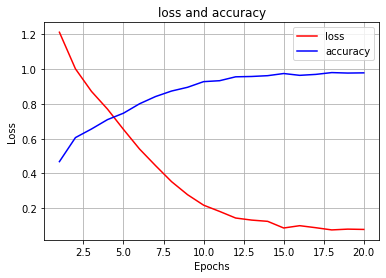

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_accuracy = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='loss')
plt.plot(epochs, val_accuracy, 'b', label='accuracy')
plt.title('loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
network.evaluate(X_test,y_test)

55/55 [==============================] - 0s 4ms/step - loss: 2.9582 - accuracy: 0.5908


[2.9581832885742188, 0.5907514691352844]

- Prediction should be > 85%

In [ ]:
pred = network.predict_classes(X_test[:10])
for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

1 ==> 4.0
1 ==> 1.0
3 ==> 3.0
4 ==> 1.0
2 ==> 2.0
0 ==> 2.0
3 ==> 2.0
3 ==> 4.0
3 ==> 2.0
0 ==> 2.0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


- Evaluation Step
- Prediction

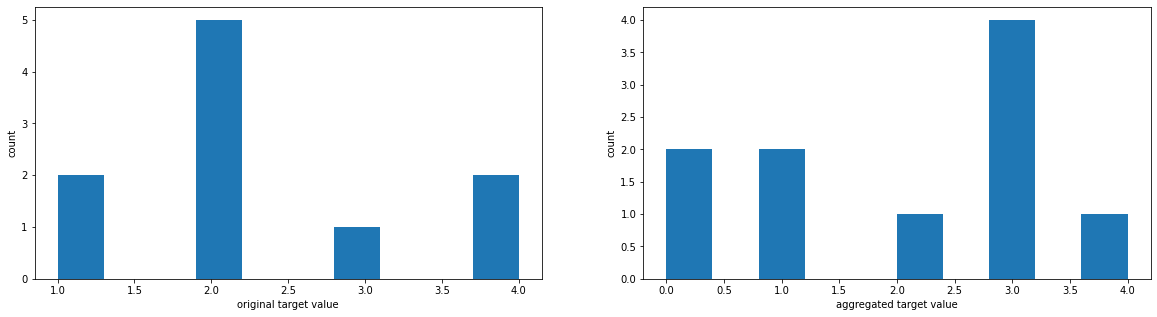

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test[:10])
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(pred)
plt.xlabel('aggregated target value')
plt.ylabel('count')
plt.show()